In [63]:
from __future__ import division
import seaborn as sns

##  Linear Regression:  $Y_{i} = \alpha + \beta * X_{i} + \epsilon_{i}$

In [ ]:
# http://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/
# Markdown math

In [3]:
# helper funcs for calculation
def mean(x):
    return sum(x) / len(x)

def de_mean(x):
    """translate x by subtracting its mean, so that result has 0 mean
    """
    return [x_i - mean(x) for x_i in x]

def covariance(x, y):
    return dot(de_mean(x), de_mean(y)) / (len(x)-1)

def correlation(x, y):
    std_x, std_y = standard_deviation(x), standard_deviation(y)
    
    if std_x > 0 and std_y > 0:
        return covariance(x, y) / std_x / std_y

In [4]:
# for example Yi: minutes that user i spent on the site daily,
#             Xi: number of friends user i has

# with determined alpha and beta
def predict(alpha, beta, x_i):
    return beta * x_i + alpha

# evaluate by error
# problem: aggregated errors may cancel out neg & pos errors
def error(alpha, beta, x_i, y_i):
    return y_i - predict(alpha, beta, x_i)

# evaluate by Sum of Squared Errors:
def sum_of_squared_errors(alpha, beta, x, y):
    return sum( error(alpha, beta, x_i, y_i)**2
        for y_i, x_i in zip(y_i, x_i))

# OLS the least square solution is to choose
# alpha and beta that minimizes the errors
def least_squares_fit(x, y):
    """giving training values for x and y, find the best alpha and beta
    """
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    
    # alpha 
    alpha = mean(y) - beta * mean(x)
    
    return alpha, beta

In [ ]:
# test


outlier = num_friends.index(100)

num_friends_good = [x for i,x in enumerate(num_friends) if num i != outlier ]

daily_minutes_good = [x for i,x in enumerate(daily_minutes) if ]

In [12]:
users = [
    {"id":0, "name":"Hero"},
    {"id":1, "name":"Dunn"},
    {"id":2, "name":"Sue"},
    {"id":3, "name":"Chi"},
    {"id":4, "name":"Thor"},
    {"id":5, "name":"Clive"},
    {"id":6, "name":"Hicks"},
    {"id":7, "name":"Devin"},
    {"id":8, "name":"Kate"},
    {"id":9, "name":"kline"},
]

friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
(4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]


for user in users:
    user['friends'] = []
    
for i, j in friendships:
    # index by sequence, which is same as id
    # users[i]['friends'] is a list, has func append()
    users[i]['friends'].append(users[j]['id']) 
    users[j]['friends'].append(users[i]['id'])


In [21]:
# Some statistics

# average num of connections
total_connections = sum(len(user['friends']) for user in users)
avg_connections = total_connections / len(users)
print(avg_connections)

# most connected people
user_friend_count_pair = [(user['id'], len(user['friends'])) for user in users]
user_friend_count_pair = sorted(user_friend_count_pair, 
                                key=lambda x:x[1] , 
                                reverse=True)
print(user_friend_count_pair)

2.4
[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]


In [57]:
# friends recommendation: friends' friends
# TODO: count of mutual friends, exclude ppl already known to the user
from collections import Counter, defaultdict

def friends_of_friends_of(user):
    return Counter(fof_id
            for friend in user['friends']
            for fof_id in users[friend]['friends']
            if user['id'] != fof_id # not user himself
            and fof_id not in user['friends']) # not user's direct friends
            
friends_of_friends_of(users[3])

Counter({0: 2, 5: 1})

In [61]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]
# Thor (4th) and Devin (7th) have no friends in common but share interest in Machine Learning

# search data scientists who have common interest in an item
def data_scientists_with_interest_with(target_interest):
    return [ds_id
            for ds_id, interest in interests
            if interest == target_interest
           ]
data_scientists_with_interest_with("Big Data")

# build an index from interests to users
# keys are interests, values are lists of users who have that interest
def get_interest_user_index():
    res = defaultdict(list)
    for user, interest in interests:
        res[interest].append(user)
    return res
user_ids_by_interest =  get_interest_user_index()

# from users to interests, users as index
interests_by_user_id = defaultdict(list)
for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

# find out who has the most interests in common with the given user

def most_common_interests_with(user_id):
    return Counter(interested_user_id
                  for interest in interests_by_user_id[user_id]
                  for interested_user_id in user_ids_by_interest[interest]
                  if interested_user_id != user_id
                  )
most_common_interests_with(0)

Counter({9: 3, 8: 1, 1: 2, 5: 1})

In [70]:
import matplotlib.pyplot as plt
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]
reverse_salaries_and_tenures = [(item[1],item[0]) for item in salaries_and_tenures]

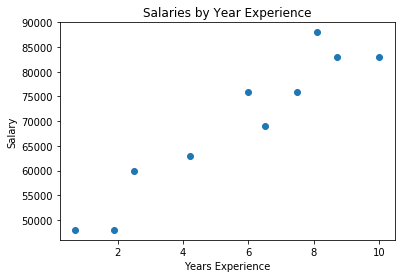

In [72]:
plt.scatter(*zip(*reverse_salaries_and_tenures))
plt.title('Salaries by Year Experience')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.show();

In [76]:
# compute average salary for each tenure
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
 }

# bucket the tenures 
# into three groups
def tenure_bucket(tenure):
    if tenure < 2:
        return 'less than two'
    elif tenure < 5:
        return 'btw two and five'
    else:
        return 'more than more'


# compute salary by tenure bucket
salary_by_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_bucket[bucket].append(salary)

average_salary_by_bucket =  {
    bucket : sum(salaries) / len(salaries)
    for bucket, salaries in salary_by_bucket.items()
}

average_salary_by_bucket

{'more than more': 79166.66666666667,
 'less than two': 48000.0,
 'btw two and five': 61500.0}

In [77]:
def predict_paid_unpaid(years_exxperience):
    if years_exxperience < 3.0:
        return 'paid'
    elif years_exxperience < 8.5:
        return 'unpaid'
    else:
        return 'paid'

In [84]:
# popular interests
top_popular = Counter(
    interest
    for user_id, interest in interests
).most_common(5)
top_popular

[('Big Data', 3), ('Java', 3), ('Python', 3), ('Hadoop', 2), ('HBase', 2)]